### References
<ul>
    <li><b>(networkx)</b> Aric A. Hagberg, Daniel A. Schult and Pieter J. Swart, “Exploring network structure, dynamics, and function using NetworkX”, in Proceedings of the 7th Python in Science Conference (SciPy2008), Gäel Varoquaux, Travis Vaught, and Jarrod Millman (Eds), (Pasadena, CA USA), pp. 11–15, Aug 2008</li>
</ul>


In [12]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from json import load
import regex as re
from pathlib import Path
from importlib import reload
from pprint import pp
from collections import Counter

In [13]:
import utils as u

In [14]:
# Call to reload an imported module if it has been updated
reload(u)

<module 'utils' from '/home/rimov/Documents/Course Material/Assignments/m450/reddit-assortativity-analysis/utils.py'>

In [47]:
%matplotlib notebook
plt.rcParams.update({'axes.titlesize': 'large'})

In [16]:
data_path = Path('data/chain_networks')
data_path.exists()

True

In [17]:
subreds_raw = dict()

In [18]:
subreddits_paths = [sr for sr in data_path.iterdir()]
subreddits = [sr.stem for sr in data_path.iterdir()]
sorted(subreddits)

['.Rhistory',
 '2007scape',
 '240sx',
 '24hoursupport',
 '3DS',
 '3Dprinting',
 '3amjokes',
 '3dsFCswap',
 '49ers',
 '4chan',
 '4x4',
 '90daysgoal',
 '911truth',
 'ABDL',
 'ABraThatFits',
 'ACMilan',
 'ACTrade',
 'ADHD',
 'AFL',
 'AMA',
 'ANormalDayInRussia',
 'AbandonedPorn',
 'Accounting',
 'ActionFigures',
 'Adelaide',
 'AdoptMyVillager',
 'Advice',
 'AdviceAnimals',
 'AfterEffects',
 'AirForce',
 'Albany',
 'Albuquerque',
 'Aleague',
 'AlienBlue',
 'AllThingsTerran',
 'AmIFreeToGo',
 'AmISexy',
 'Amateur',
 'AmateurArchives',
 'AmericanHorrorStory',
 'Amsterdam',
 'Anarchism',
 'Anarcho_Capitalism',
 'Anarchy101',
 'Android',
 'AndroidGaming',
 'AndroidQuestions',
 'AnimalCrossing',
 'AnimalsBeingBros',
 'AnimalsBeingJerks',
 'AnimeFigures',
 'AnimeSketch',
 'Animesuggest',
 'AnnArbor',
 'AntiJokes',
 'Anticonsumption',
 'Anxiety',
 'AnythingGoesNews',
 'AppHookup',
 'AppalachianTrail',
 'Aquariums',
 'ArcherFX',
 'Archery',
 'Argentinacirclejerk',
 'Art',
 'ArtisanVideos',
 'Artis

In [19]:
topics = ['Ask_Politics', 'CanadaPolitics', 'Conservative', 'Feminism', 'Liberal', 'Libertarian', 'MURICA', 'MensRights', 'NeutralPolitics', 'PoliticalDiscussion', 'PoliticalHumor', 'PropagandaPosters', 'Republican', 'againstmensrights', 'conspiracy', 'news', 'socialism', 'ukpolitics', 'worldnews', 'politics']
topics_sec = ['CanadaPolitics', 'Feminism', 'MURICA', 'MensRights', 'PoliticalHumor', 'PropagandaPosters', 'againstmensrights', 'conspiracy', 'news', 'ukpolitics', 'worldnews', 'politics']
topics_prim = set(topics).difference(set(topics_sec))

In [20]:
print(f'Subreddits of interest: {len(topics)}, '\
      f'secondary {len(topics_sec)}, primary {len(topics_prim)}')
topics_prim

Subreddits of interest: 20, secondary 12, primary 8


{'Ask_Politics',
 'Conservative',
 'Liberal',
 'Libertarian',
 'NeutralPolitics',
 'PoliticalDiscussion',
 'Republican',
 'socialism'}

In [21]:
prim_paths = [data_path/f'{topic}.json' for topic in topics_prim]

In [22]:
topics_exist = [[(sr.stem, sr in subreddits_paths) for sr in prim_paths]]
topics_exist

[[('Liberal', True),
  ('socialism', True),
  ('NeutralPolitics', True),
  ('Ask_Politics', True),
  ('Conservative', True),
  ('Republican', True),
  ('PoliticalDiscussion', True),
  ('Libertarian', True)]]

In [23]:
graphs = dict()
for topic in prim_paths:
    try:
        with open(topic) as f:
            js = load(f)
            
            # Merge the dictionaries representing a single subreddit
            data_dict = dict()
            for j in js:
                data_dict.update(j)
                
            graphs[topic.stem] = nx.DiGraph(data_dict)
    except nx.NetworkXError as ne:
        print(ne)
        print(f'Bad entry length: {len(d)}, type: {type(d)}\nElements: {d}')
        
    except ValueError as je:
        print(je)
        continue

In [24]:
graphs

{'Liberal': <networkx.classes.digraph.DiGraph at 0x7fdaf6098520>,
 'socialism': <networkx.classes.digraph.DiGraph at 0x7fdaf6098310>,
 'NeutralPolitics': <networkx.classes.digraph.DiGraph at 0x7fdaf6098970>,
 'Ask_Politics': <networkx.classes.digraph.DiGraph at 0x7fdaf6098eb0>,
 'Conservative': <networkx.classes.digraph.DiGraph at 0x7fdaf5f844f0>,
 'Republican': <networkx.classes.digraph.DiGraph at 0x7fdb381e5100>,
 'PoliticalDiscussion': <networkx.classes.digraph.DiGraph at 0x7fdaf5f84250>,
 'Libertarian': <networkx.classes.digraph.DiGraph at 0x7fdaf6084250>}

In [25]:
print('Number nodes, edges by subreddit: ')
pp([f'{n}: {g.number_of_nodes()}, {g.number_of_edges()}' for n, g in graphs.items()])
print('Density:')
pp([f'{n}: {np.round(nx.density(g), 5)}' for n, g in graphs.items()])

Number nodes, edges by subreddit: 
['Liberal: 2146, 5108',
 'socialism: 6564, 25401',
 'NeutralPolitics: 2518, 6963',
 'Ask_Politics: 2488, 6177',
 'Conservative: 8605, 27099',
 'Republican: 1543, 3644',
 'PoliticalDiscussion: 8617, 37107',
 'Libertarian: 15901, 54401']
Density:
['Liberal: 0.00111',
 'socialism: 0.00059',
 'NeutralPolitics: 0.0011',
 'Ask_Politics: 0.001',
 'Conservative: 0.00037',
 'Republican: 0.00153',
 'PoliticalDiscussion: 0.0005',
 'Libertarian: 0.00022']


In [26]:
# NetworkX's .draw_networkx() options
nx_opts = {'node_size': 10, 'arrowsize': 7, 'width': 0.3, 'with_labels': False}

plt.close('all')

fig = plt.figure(num=1, figsize=(6,6))

# Get images of all networks of interest
for n,g in graphs.items():
    if n in {'Ask_Politics', 'Conservative', 'Libertarian', 'NeutralPolitics', 'Republican'}:
        continue
    
    plt.clf()
    fig.suptitle(f'r/{n}')
    
    nx.draw_networkx(g, **nx_opts)
    plt.show()
    
    plt.savefig(f'images/{n}.png', bbox_inches='tight')

#### NOTE:
Examine basic parameters (diameter, connectivity, ) of networks and compare

In [27]:
params = pd.DataFrame(np.zeros((8,3)), index=list(graphs.keys()), columns=['density','diameter','connectivity'])
params

,density,diameter,connectivity
Liberal,0.0,0.0,0.0
socialism,0.0,0.0,0.0
NeutralPolitics,0.0,0.0,0.0
Ask_Politics,0.0,0.0,0.0
Conservative,0.0,0.0,0.0
Republican,0.0,0.0,0.0
PoliticalDiscussion,0.0,0.0,0.0
Libertarian,0.0,0.0,0.0


In [28]:
density = {n: np.round(nx.density(g), 5) for n,g in graphs.items()}
params['density'] = density
params

,density,diameter,connectivity
Liberal,0.00111,0.0,0.0
socialism,0.00059,0.0,0.0
NeutralPolitics,0.00110,0.0,0.0
Ask_Politics,0.00100,0.0,0.0
Conservative,0.00037,0.0,0.0
Republican,0.00153,0.0,0.0
PoliticalDiscussion,0.00050,0.0,0.0
Libertarian,0.00022,0.0,0.0


In [29]:
params = params.drop(columns=['diameter', 'connectivity'])
params

,density
Liberal,0.00111
socialism,0.00059
NeutralPolitics,0.00110
Ask_Politics,0.00100
Conservative,0.00037
Republican,0.00153
PoliticalDiscussion,0.00050
Libertarian,0.00022


#### NOTE:
Diameter and connectivity are 0, will drop and perhaps measure just in the strong components later. 

In [30]:
strong_conn = {n: nx.number_strongly_connected_components(g) for n,g in graphs.items()}
params['strong_components'] = strong_conn
params

,density,strong_components
Liberal,0.00111,1542
socialism,0.00059,4209
NeutralPolitics,0.00110,1838
Ask_Politics,0.00100,1821
Conservative,0.00037,5970
Republican,0.00153,1165
PoliticalDiscussion,0.00050,5885
Libertarian,0.00022,11636


#### NOTE:
Finding a lot of single strong components. The dataset included top~20% of reddit users by activity (comments) in 2014 and connections signify comments that were made on the same linear chain separated by at most 2 comments. This could mean a few things: strong connectivity could imply strong presence of dialogue? Whereas weak connectivity could mean more "stray" comments/posts that target masses and promote. Recording the amounts.

In [109]:
nodes = {n: g.number_of_nodes() for n, g in graphs.items()}
params['nodes'] = nodes
params

,density,strong_components,nodes,pct_strongest_comp,pct_deg_one_nodes,pagerank_max,pagerank_avg,reciprocity
Liberal,0.00111,1542,2146,0.181267,0.246505,0.014467,0.000466,0.198904
socialism,0.00059,4209,6564,0.306520,0.181292,0.014605,0.000152,0.209283
NeutralPolitics,0.00110,1838,2518,0.150119,0.152899,0.035894,0.000397,0.175499
Ask_Politics,0.00100,1821,2488,0.165193,0.235932,0.020196,0.000402,0.194269
Conservative,0.00037,5970,8605,0.257176,0.211970,0.018490,0.000116,0.140227
Republican,0.00153,1165,1543,0.158134,0.239145,0.038785,0.000648,0.190450
PoliticalDiscussion,0.00050,5885,8617,0.255193,0.155855,0.010399,0.000116,0.211281
Libertarian,0.00022,11636,15901,0.218099,0.188730,0.008555,0.000063,0.165916


In [84]:
def get_strong_comp_distrib(graphs):
    strong_comps = {n: nx.strongly_connected_components(g) for n,g in graphs.items()}

    strong_comp_distrib = {n: Counter() for n in strong_comps.keys()}
    for sr, comps in strong_comps.items():
        for comp in comps:
            comp_size = len(comp) # size of component
            strong_comp_distrib[sr][comp_size] += 1 # increment count
            
    return strong_comp_distrib

In [99]:
def count_strongest_comp(graphs, node_count, pct=True):
    strong_comps = {n: nx.strongly_connected_components(g) for n,g in graphs.items()}
    strong_comp_distrib = get_strong_comp_distrib(graphs)
    
    strongest_comp = {n: sorted(c, reverse=True)[0] for n,c in strong_comp_distrib.items()}
    
    if pct:
        pct_strongest = dict()
        for sr, count in node_count.items():
            pct_strongest[sr] = strongest_comp[sr]/node_count[sr]
        
        return pct_strongest
    
    return strongest_comp

In [33]:
{n: c.most_common(10) for n,c in strong_comp_distrib.items()}

{'Liberal': [(1, 1393),
  (2, 112),
  (3, 24),
  (4, 7),
  (5, 3),
  (389, 1),
  (13, 1),
  (12, 1)],
 'socialism': [(1, 3983),
  (2, 190),
  (3, 21),
  (4, 7),
  (6, 2),
  (2012, 1),
  (35, 1),
  (7, 1),
  (25, 1),
  (5, 1)],
 'NeutralPolitics': [(1, 1636),
  (2, 152),
  (3, 28),
  (4, 11),
  (5, 6),
  (378, 1),
  (7, 1),
  (17, 1),
  (8, 1),
  (10, 1)],
 'Ask_Politics': [(1, 1619),
  (2, 162),
  (3, 29),
  (4, 6),
  (6, 3),
  (411, 1),
  (5, 1)],
 'Conservative': [(1, 5620),
  (2, 302),
  (3, 30),
  (4, 11),
  (6, 4),
  (5, 2),
  (2213, 1)],
 'Republican': [(1, 1066),
  (2, 77),
  (3, 14),
  (4, 3),
  (7, 2),
  (244, 1),
  (5, 1),
  (6, 1)],
 'PoliticalDiscussion': [(1, 5555),
  (2, 256),
  (3, 41),
  (4, 9),
  (5, 8),
  (6, 6),
  (7, 2),
  (2199, 1),
  (14, 1),
  (9, 1)],
 'Libertarian': [(1, 11007),
  (2, 520),
  (3, 74),
  (4, 18),
  (5, 9),
  (6, 4),
  (7, 2),
  (3468, 1),
  (9, 1)]}

In [88]:
strongest_comp = count_strongest_comp(graphs)
strongest_comp

{'Liberal': 389,
 'socialism': 2012,
 'NeutralPolitics': 378,
 'Ask_Politics': 411,
 'Conservative': 2213,
 'Republican': 244,
 'PoliticalDiscussion': 2199,
 'Libertarian': 3468}

In [113]:
# Percent of nodes inside the strongest-connected component
params['pct_strongest_comp'] = count_strongest_comp(graphs, nodes)

In [104]:
params.sort_values(by=['pct_strongest_comp'], ascending=False)

,density,strong_components,nodes,pct_strongest_comp,pct_deg_one_nodes,pagerank_max,pagerank_avg,reciprocity
socialism,0.00059,4209,6564,0.306520,0.181292,0.014605,0.000152,0.209283
Conservative,0.00037,5970,8605,0.257176,0.211970,0.018490,0.000116,0.140227
PoliticalDiscussion,0.00050,5885,8617,0.255193,0.155855,0.010399,0.000116,0.211281
Libertarian,0.00022,11636,15901,0.218099,0.188730,0.008555,0.000063,0.165916
Liberal,0.00111,1542,2146,0.181267,0.246505,0.014467,0.000466,0.198904
Ask_Politics,0.00100,1821,2488,0.165193,0.235932,0.020196,0.000402,0.194269
Republican,0.00153,1165,1543,0.158134,0.239145,0.038785,0.000648,0.190450
NeutralPolitics,0.00110,1838,2518,0.150119,0.152899,0.035894,0.000397,0.175499


#### NOTE:
Seems to be some correlation between network density and percent of nodes inside strongest-connected component

In [105]:
def count_deg_one_nodes(graphs, node_count, pct=True):
    degrees = {n: nx.degree(g) for n, g in graphs.items()}
    
    # Counting amount of lowest degree nodes (1 in this case)
    singles = Counter()
    for sr, degs in degrees.items():
        for user, deg in degs:
            if deg == 1:
                singles[sr] += 1
                
    if pct:
        pct_singles = dict()
        for sr, count in node_count.items():
            pct_singles[sr] = singles[sr]/node_count[sr]
        
        return pct_singles
                
    return singles

In [110]:
singles = count_deg_one_nodes(graphs, nodes, False)
singles

Counter({'Liberal': 529,
         'socialism': 1190,
         'NeutralPolitics': 385,
         'Ask_Politics': 587,
         'Conservative': 1824,
         'Republican': 369,
         'PoliticalDiscussion': 1343,
         'Libertarian': 3001})

In [111]:
params['pct_deg_one_nodes'] = count_deg_one_nodes(graphs, nodes, True)

In [112]:
params.sort_values(by=['pct_deg_one_nodes'], ascending=False)

,density,strong_components,nodes,pct_strongest_comp,pct_deg_one_nodes,pagerank_max,pagerank_avg,reciprocity
Liberal,0.00111,1542,2146,0.181267,0.246505,0.014467,0.000466,0.198904
Republican,0.00153,1165,1543,0.158134,0.239145,0.038785,0.000648,0.190450
Ask_Politics,0.00100,1821,2488,0.165193,0.235932,0.020196,0.000402,0.194269
Conservative,0.00037,5970,8605,0.257176,0.211970,0.018490,0.000116,0.140227
Libertarian,0.00022,11636,15901,0.218099,0.188730,0.008555,0.000063,0.165916
socialism,0.00059,4209,6564,0.306520,0.181292,0.014605,0.000152,0.209283
PoliticalDiscussion,0.00050,5885,8617,0.255193,0.155855,0.010399,0.000116,0.211281
NeutralPolitics,0.00110,1838,2518,0.150119,0.152899,0.035894,0.000397,0.175499


#### NOTE:
Need to now analyze the distribution across the 8 subreddits and compare to randomly distributed graphs. 

Notice how large some of the strong components are -- see what percent of the total nodes are in those strong components.

### Centrality

Considering that every node in the dataset constitutes top ~20% of Redditors from 2014, it seems better to use Katz centrality, in order to ensure no node is labeled irrelevant. But, don't want to assign high centrality just by association with "important" nodes, therefore will use PageRank.

In [92]:
def get_pagerank_max_avg(graphs):
    """
    
    """
    pagerankings = {n: nx.pagerank(g) for n,g in graphs.items()}
    
    pr_max = {n: max(r.values()) for n,r in pagerankings.items()}
    pr_avg = {n: np.average(list(r.values())) for n,r in pagerankings.items()}
    
    return pr_max, pr_avg

In [94]:
pagerankings = {n: nx.pagerank(g) for n,g in graphs.items()}
pr_max, pr_avg = get_pagerank_max_avg(graphs)

In [95]:
params['pagerank_max'] = pr_max
params['pagerank_avg'] = pr_avg

In [96]:
params.sort_values(by=['pagerank_max'], ascending=False)

,density,strong_components,nodes,pct_strongest_comp,pct_deg_one_nodes,pagerank_max,pagerank_avg,reciprocity
Republican,0.00153,1165,1543,0.158134,0.239145,0.038785,0.000648,0.190450
NeutralPolitics,0.00110,1838,2518,0.150119,0.152899,0.035894,0.000397,0.175499
Ask_Politics,0.00100,1821,2488,0.165193,0.235932,0.020196,0.000402,0.194269
Conservative,0.00037,5970,8605,0.257176,0.211970,0.018490,0.000116,0.140227
socialism,0.00059,4209,6564,0.306520,0.181292,0.014605,0.000152,0.209283
Liberal,0.00111,1542,2146,0.181267,0.246505,0.014467,0.000466,0.198904
PoliticalDiscussion,0.00050,5885,8617,0.255193,0.155855,0.010399,0.000116,0.211281
Libertarian,0.00022,11636,15901,0.218099,0.188730,0.008555,0.000063,0.165916


<IPython.core.display.Javascript object>


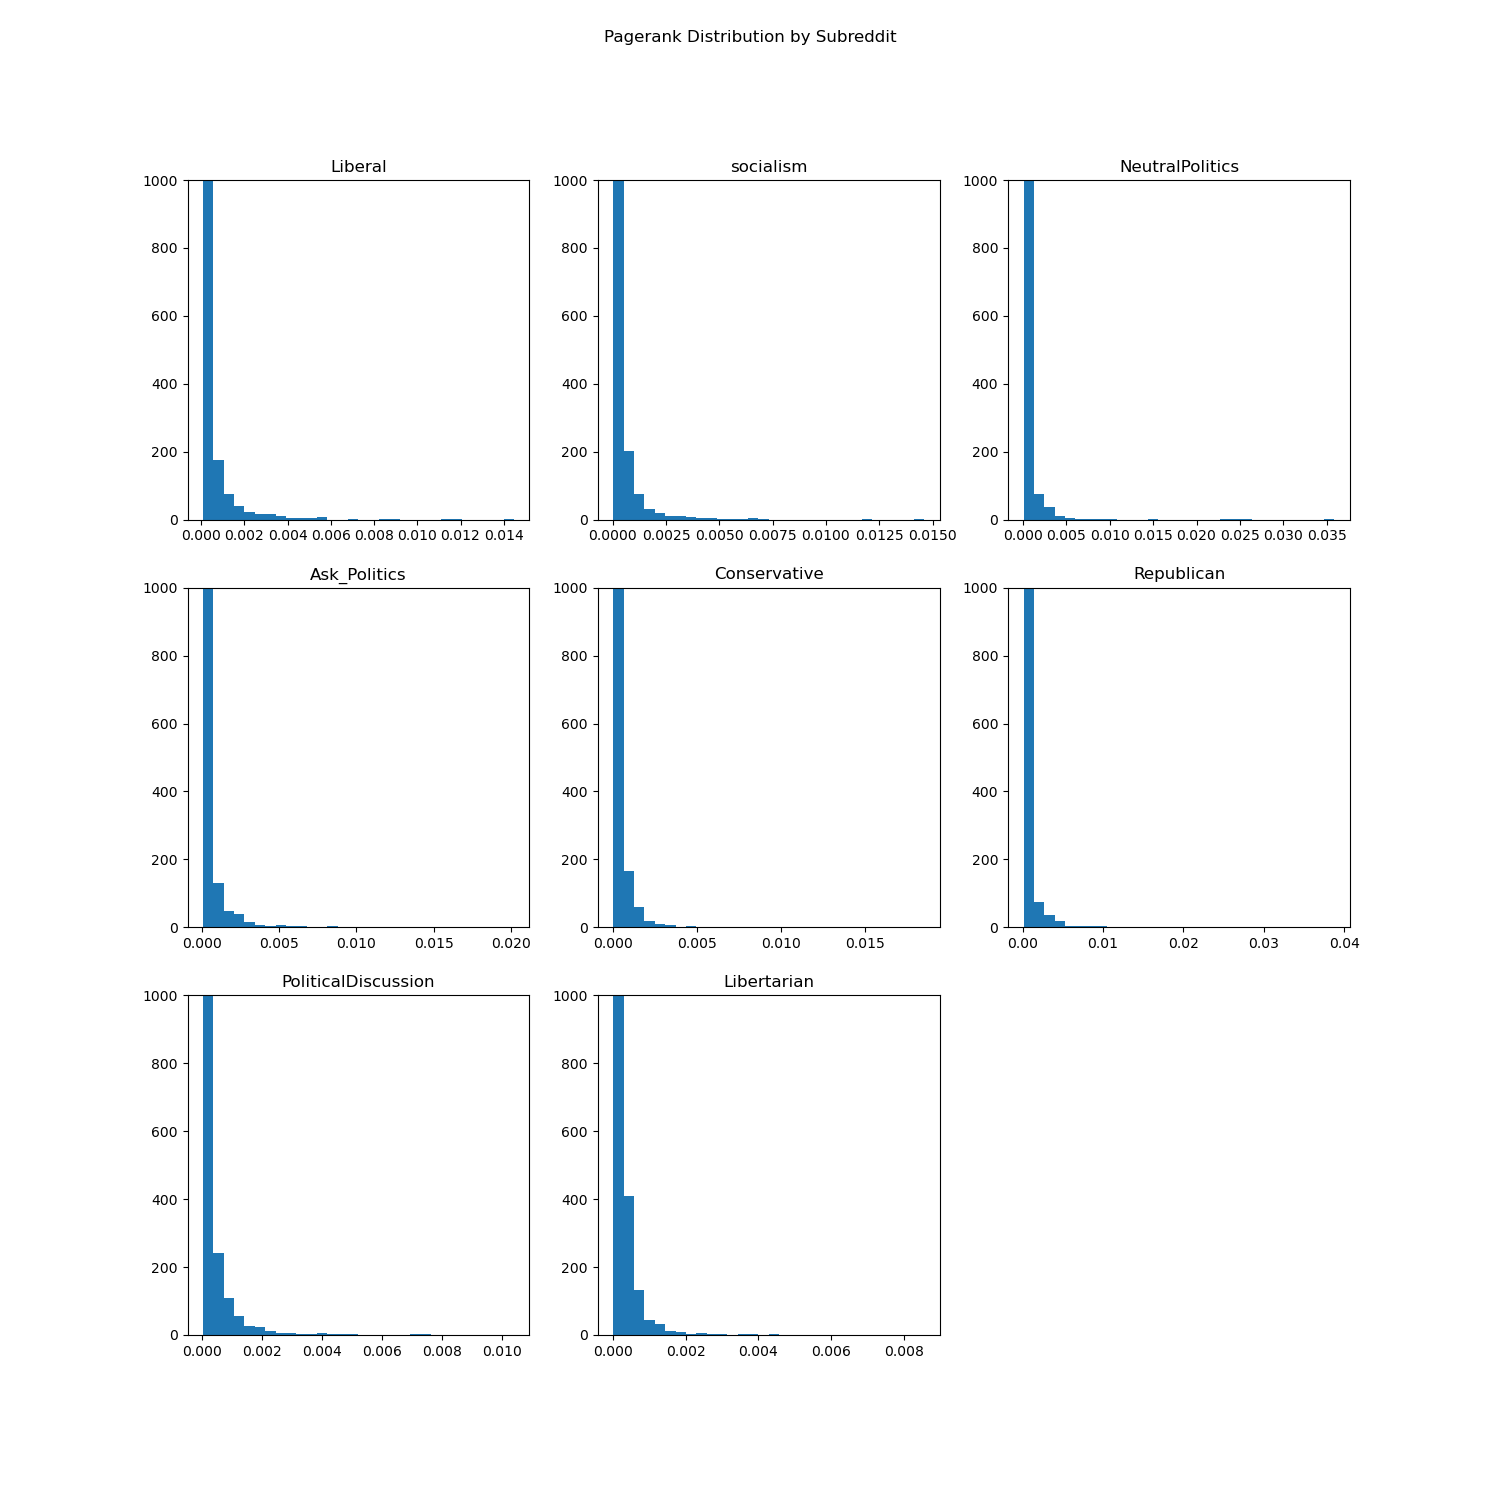

In [48]:
fig = plt.figure(figsize=(15,15))

In [53]:
plt.clf()
for i, (sr, pageranks) in enumerate(pagerankings.items()):
    fig.suptitle('Pagerank Distribution by Subreddit')
    ax = fig.add_subplot(3,3,i+1)
    ax.set_title(sr)
    ax.set_ylim(ymax=1000)
    
    ax.hist(pageranks.values(), bins=30)
    
plt.show()

#### NOTE:
The distribution of the pagerank is obviously right-skewed, with no clear distinctions between the subreddits

### Reciprocity
The final measure I will compute for now. The percent of nodes that have back and forth communication in subreddits (represented by edges in both directions).

In [56]:
reciproc = {n: nx.reciprocity(g) for n,g in graphs.items()}
params['reciprocity'] = reciproc

In [57]:
params.sort_values(by=['reciprocity'], ascending=False)

,density,strong_components,nodes,pct_strongest_comp,pct_deg_one_nodes,pagerank_max,pagerank_avg,reciprocity
PoliticalDiscussion,0.00050,5885,8617,0.255193,0.155855,0.010399,0.000116,0.211281
socialism,0.00059,4209,6564,0.306520,0.181292,0.014605,0.000152,0.209283
Liberal,0.00111,1542,2146,0.181267,0.246505,0.014467,0.000466,0.198904
Ask_Politics,0.00100,1821,2488,0.165193,0.235932,0.020196,0.000402,0.194269
Republican,0.00153,1165,1543,0.158134,0.239145,0.038785,0.000648,0.190450
NeutralPolitics,0.00110,1838,2518,0.150119,0.152899,0.035894,0.000397,0.175499
Libertarian,0.00022,11636,15901,0.218099,0.188730,0.008555,0.000063,0.165916
Conservative,0.00037,5970,8605,0.257176,0.211970,0.018490,0.000116,0.140227


#### NOTE:
Looks like left and right-wing subreddits are on the opposite spectrums, with highest reciprocity on the liberal side. There also seems to be some correlation between strongest-connected component membership and reciprocity (which would make sense since you are more likely to get a reply back and have a discussion if you are part of an existing community)

### Probabilities Against Random Graphs
Calculating the P-values of the observed statistics using the configuration model to mimick the degree distribution. Statistics to sample for: 
<ul>
    <li>percent in strongest-connected component</li>
    <li>percent degree one nodes</li>
    <li>maximum pagerank</li>
    <li>average pagerank</li>
    <li>reciprocity</li>
</ul>.

In [71]:
in_degrees = {n: dict(g.in_degree()).values() for n,g in graphs.items()}
out_degrees = {n: dict(g.out_degree()).values() for n,g in graphs.items()}

In [76]:
fig = plt.figure(figsize=(15,9))

<IPython.core.display.Javascript object>

In [80]:
plt.clf()
for i, (sr, degrees) in enumerate(in_degrees.items()):
    fig.suptitle('Degree Distributions')
    ax_in = fig.add_subplot(3,6,i*2+1)
    ax_out = fig.add_subplot(3,6,i*2+2)
    ax_in.set_title(f'{sr} (in)')
    ax_in.set_xlim(xmax=100)
    ax_in.set_ylim(ymax=1000)
    ax_out.set_title(f'{sr} (out)')
    ax_out.set_xlim(xmax=100)
    ax_out.set_ylim(ymax=1000)
    
    ax_in.hist(degrees, bins=30)
    ax_out.hist(degrees, bins=30, color='g')

plt.tight_layout()
plt.show()

In [81]:
plt.savefig('images/degree_distribution.png', bbox_inches='tight')

In [151]:
sample_pct_strong_comps = {n: list() for n in params.index}
sample_pct_deg_one = {n: list() for n in params.index}
sample_pr_max = {n: list() for n in params.index}
sample_pr_avg = {n: list() for n in params.index}
sample_reciproc = {n: list() for n in params.index}

In [152]:
for i in range(1000):
    if i%10 == 0:
        print(f'***Resampled {i}')
    
    config_models = dict()
    
    for sr in graphs.keys():
        config_models[sr] = nx.directed_configuration_model(
            in_degrees[sr],
            out_degrees[sr],
            seed=i # To be able to later recreate, will use the index as random generator seed
        )
    
    pct_strong_comps = count_strongest_comp(config_models, nodes, True)
    pct_deg_one = count_deg_one_nodes(config_models, nodes, True)
    pr_max, pr_avg = get_pagerank_max_avg(config_models)
    reciproc = {n: nx.reciprocity(g) for n,g in config_models.items()}
    
    for sr in graphs.keys():
        sample_pct_strong_comps[sr].append(pct_strong_comps[sr])
        sample_pct_deg_one[sr].append(pct_deg_one[sr])
        sample_pr_max[sr].append(pr_max[sr])
        sample_pr_avg[sr].append(pr_avg[sr])
        sample_reciproc[sr].append(reciproc[sr])

***Resampled 0
***Resampled 10
***Resampled 20
***Resampled 30
***Resampled 40
***Resampled 50
***Resampled 60
***Resampled 70
***Resampled 80
***Resampled 90
***Resampled 100
***Resampled 110
***Resampled 120
***Resampled 130
***Resampled 140
***Resampled 150
***Resampled 160
***Resampled 170
***Resampled 180
***Resampled 190
***Resampled 200
***Resampled 210
***Resampled 220
***Resampled 230
***Resampled 240
***Resampled 250
***Resampled 260
***Resampled 270
***Resampled 280
***Resampled 290
***Resampled 300
***Resampled 310
***Resampled 320
***Resampled 330
***Resampled 340
***Resampled 350
***Resampled 360
***Resampled 370
***Resampled 380
***Resampled 390
***Resampled 400
***Resampled 410
***Resampled 420
***Resampled 430
***Resampled 440
***Resampled 450
***Resampled 460
***Resampled 470
***Resampled 480
***Resampled 490
***Resampled 500
***Resampled 510
***Resampled 520
***Resampled 530
***Resampled 540
***Resampled 550
***Resampled 560
***Resampled 570
***Resampled 580
***Resam

In [169]:
params

,density,strong_components,nodes,pct_strongest_comp,pct_deg_one_nodes,pagerank_max,pagerank_avg,reciprocity
Liberal,0.00111,1542,2146,0.181267,0.246505,0.014467,0.000466,0.198904
socialism,0.00059,4209,6564,0.306520,0.181292,0.014605,0.000152,0.209283
NeutralPolitics,0.00110,1838,2518,0.150119,0.152899,0.035894,0.000397,0.175499
Ask_Politics,0.00100,1821,2488,0.165193,0.235932,0.020196,0.000402,0.194269
Conservative,0.00037,5970,8605,0.257176,0.211970,0.018490,0.000116,0.140227
Republican,0.00153,1165,1543,0.158134,0.239145,0.038785,0.000648,0.190450
PoliticalDiscussion,0.00050,5885,8617,0.255193,0.155855,0.010399,0.000116,0.211281
Libertarian,0.00022,11636,15901,0.218099,0.188730,0.008555,0.000063,0.165916


In [188]:
def get_p_value(params, samples, field):
    p_vals = dict()
    
    for sr, stat in samples.items():
        portion_lt = params.loc[sr, field] > np.array(stat)
        portion_gt = params.loc[sr, field] < np.array(stat)
        
        # Use the smaller of the portion values as we're looking for min p-value
        portion = min(sum(portion_lt), sum(portion_gt))
        
        # 1000 was the size of the resamples -- shouldn't be hardcoded but done for sake of time
        p_vals[sr] = portion/1000
    
    return p_vals

In [189]:
p_val_strong = get_p_value(params, sample_pct_strong_comps, 'pct_strongest_comp')
p_val_deg_one = get_p_value(params, sample_pct_deg_one, 'pct_deg_one_nodes')
p_val_pr_max = get_p_value(params, sample_pr_max, 'pagerank_max')
p_val_pr_avg = get_p_value(params, sample_pr_avg, 'pagerank_avg')
p_val_recip = get_p_value(params, sample_reciproc, 'reciprocity')

#### NOTE:
Degree one distribution obviously doesn't work when using the configuration model as you specify the degree distribution. The mean average page rank distribution being exactly the same was initially surprising but I believe the issue is the same as for the degree one distribution.

<IPython.core.display.Javascript object>


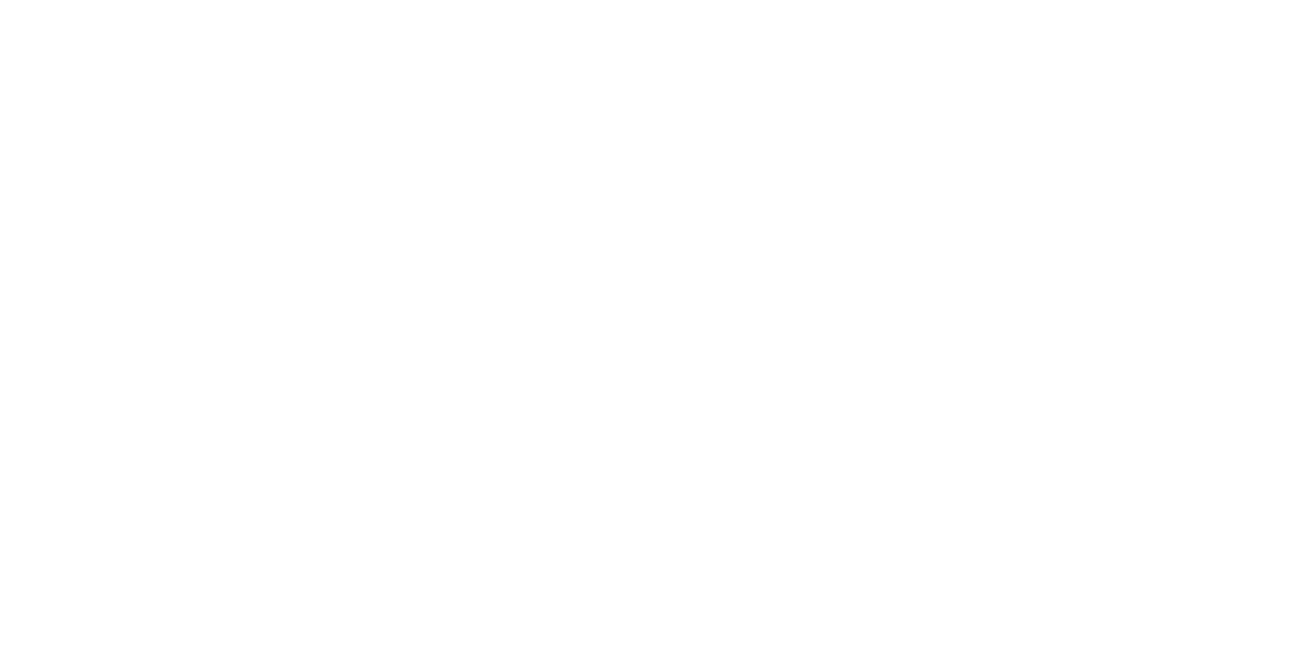

In [208]:
fig = plt.figure(figsize=(12,6))

In [192]:
plt.clf()
for i, (sr, pct) in enumerate(sample_pct_strong_comps.items()):
    fig.suptitle('Distribution of Percent of Nodes Inside Strongest-Connected Component')
    ax = fig.add_subplot(2,4,i+1)
    ax.set_title(f'{sr} (P: {np.round(p_val_strong[sr], 5)})')
    ax.set_ylim(ymax=300)
    
    ax.hist(pct)
    ax.axvline(params.loc[sr, 'pct_strongest_comp'], color='r')
    
plt.tight_layout()
plt.show()

In [193]:
plt.savefig('images/p-strong-comp.png', bbox_inches='tight')

## Excuse the ugly copy paste, done for sake of time

<IPython.core.display.Javascript object>


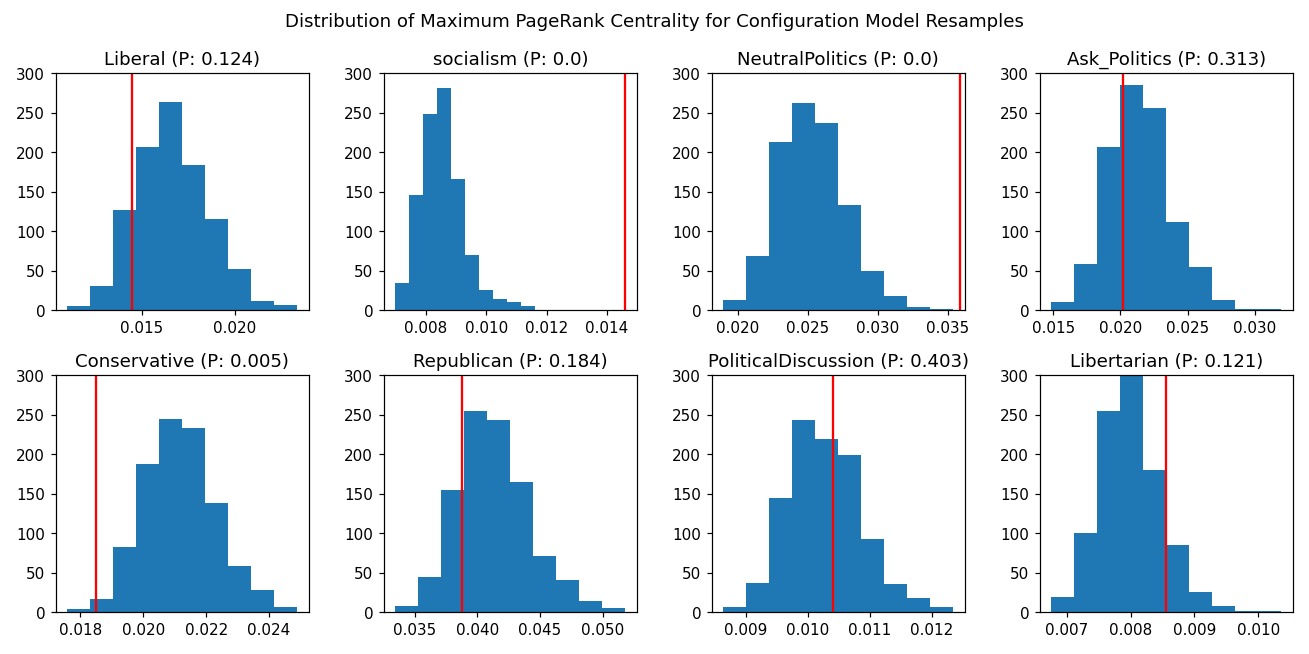

In [200]:
fig = plt.figure(figsize=(12,6))

In [201]:
plt.clf()
for i, (sr, pct) in enumerate(sample_pr_max.items()):
    fig.suptitle('Distribution of Maximum PageRank Centrality for Configuration Model Resamples')
    ax = fig.add_subplot(2,4,i+1)
    ax.set_title(f'{sr} (P: {np.round(p_val_pr_max[sr], 5)})')
    ax.set_ylim(ymax=300)
    
    ax.hist(pct)
    ax.axvline(params.loc[sr, 'pagerank_max'], color='r')
    
plt.tight_layout()
plt.show()

In [202]:
plt.savefig('images/p-pagerank-max.png', bbox_inches='tight')

<IPython.core.display.Javascript object>


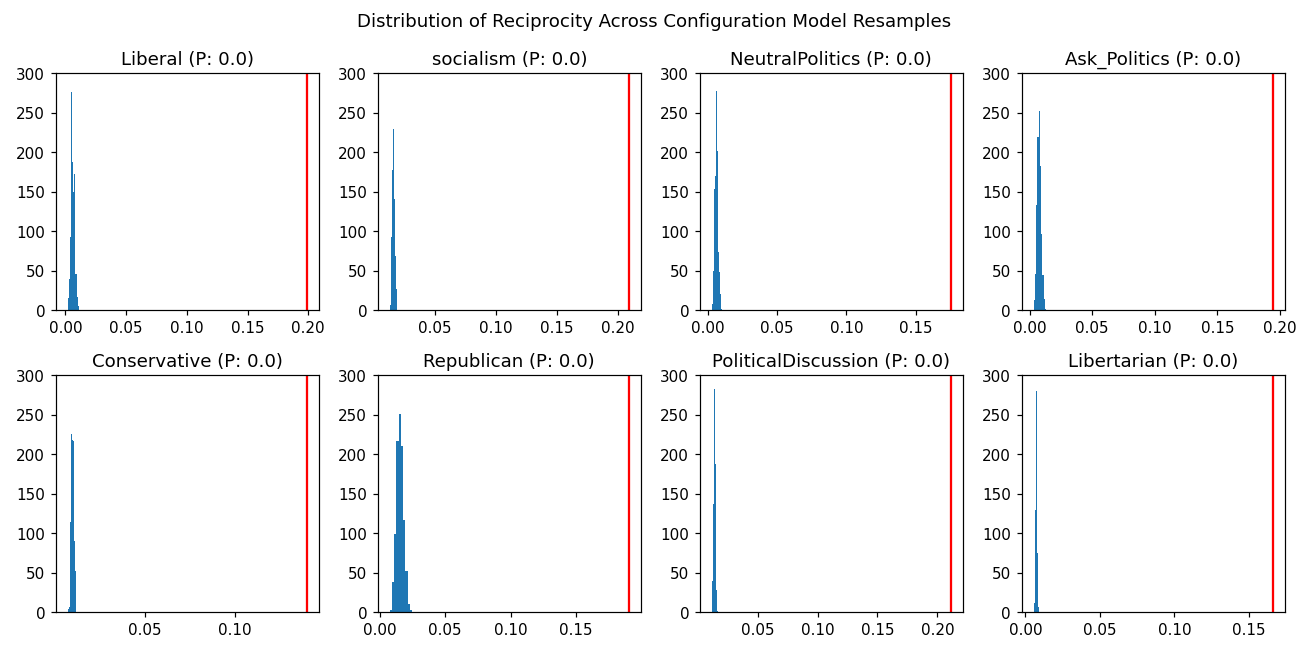

In [205]:
fig = plt.figure(figsize=(12,6))

In [206]:
plt.clf()
for i, (sr, pct) in enumerate(sample_reciproc.items()):
    fig.suptitle('Distribution of Reciprocity Across Configuration Model Resamples')
    ax = fig.add_subplot(2,4,i+1)
    ax.set_title(f'{sr} (P: {np.round(p_val_recip[sr], 5)})')
    ax.set_ylim(ymax=300)
    
    ax.hist(pct)
    ax.axvline(params.loc[sr, 'reciprocity'], color='r')
    
plt.tight_layout()
plt.show()

In [207]:
plt.savefig('images/p-reciprocity.png', bbox_inches='tight')